In [30]:
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from Normalization.Normalization import normalize_genre
from MovieClean.MovieClean import genre_cleaning, data_type


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Cleaning using data_type package and genre_cleaning package

In [31]:
meta_data_df = pd.read_csv('Data/raw_movies_metadata.csv')
meta_data_df = data_type.budget_revenue_cols_to_float(meta_data_df)
meta_data_df = genre_cleaning.extract_genre(meta_data_df)

/tmp/ipykernel_5045/2048235694.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data_df = pd.read_csv('Data/raw_movies_metadata.csv')
/workspaces/CSE314Final/MovieClean/MovieClean/data_type.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data_df['id'] = meta_data_df['id'].astype(float)
/workspaces/CSE314Final/MovieClean/MovieClean/data_type.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data_df['budget'] = meta_data_df['budg

In [32]:
meta_data_df.head(3)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_names_list
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,NaN,65000000.0,NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
3,False,NaN,16000000.0,NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"


## Data Normalization

In [33]:
meta_data_df = normalize_genre.movie_profit_calculation(meta_data_df)
meta_data_df = normalize_genre.movie_revenue_budget_ratio(meta_data_df)

In [34]:
meta_data_df_one_hot = normalize_genre.one_hot_encoding(meta_data_df)
meta_data_df_one_hot.head(3)

/workspaces/CSE314Final/Normalization/Normalization/normalize_genre.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres_onehot = pd.get_dummies(meta_data_genre_col.apply(pd.Series).stack(), prefix='Genre').sum(level=0)
/workspaces/CSE314Final/Normalization/Normalization/normalize_genre.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_onehot = pd.get_dummies(meta_data_genre_col.apply(pd.Series).stack(), prefix='Genre').sum(level=0)


,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_names_list,profit,ratio_rev_budget,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",343554033.0,12.451801,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,NaN,65000000.0,NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",197797249.0,4.043035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,NaN,16000000.0,NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]",65452156.0,5.090760,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
genre_median_df = normalize_genre.genre_median_statistics(meta_data_df_one_hot)
genre_mean_df = normalize_genre.genre_mean_statistics(meta_data_df_one_hot)

In [36]:
genre_mean_df

,revenue,budget,profit,rev/budget
Genre_Action,1.389574e+08,4.970629e+07,8.925113e+07,725.546465
Genre_Adventure,2.044798e+08,6.375163e+07,1.407282e+08,1067.829702
Genre_Animation,2.236707e+08,6.349736e+07,1.601733e+08,6.757335
Genre_Comedy,8.349717e+07,2.825436e+07,5.524281e+07,8364.088789
Genre_Crime,6.988075e+07,2.798376e+07,4.189699e+07,14385.760331
Genre_Documentary,1.755636e+07,4.316854e+06,1.323950e+07,105.997196
Genre_Drama,5.789328e+07,2.236956e+07,3.552372e+07,10111.152679
Genre_Family,1.950257e+08,5.785039e+07,1.371753e+08,1920.080575
Genre_Fantasy,1.987378e+08,6.190066e+07,1.368371e+08,5.955176
Genre_Foreign,4.193511e+06,3.631380e+06,5.621313e+05,3.158545


In [37]:
genre_median_df

,revenue,budget,profit,rev/budget
Genre_Action,54700105.0,30000000.0,19804129.0,2.014444
Genre_Adventure,85370015.0,40000000.0,42533378.5,2.291962
Genre_Animation,117932401.0,51000000.0,69327687.0,2.774916
Genre_Comedy,32307307.0,17600000.0,12543720.0,2.106664
Genre_Crime,30328152.0,19000000.0,10018195.5,1.878977
Genre_Documentary,3166000.0,2000000.0,1450211.0,2.600000
Genre_Drama,19300483.0,13000000.0,5139618.0,1.750000
Genre_Family,94547600.5,40000000.0,51546325.5,2.483950
Genre_Fantasy,84552250.0,40000000.0,37365581.0,2.126080
Genre_Foreign,1179676.0,2000000.0,0.0,1.000000


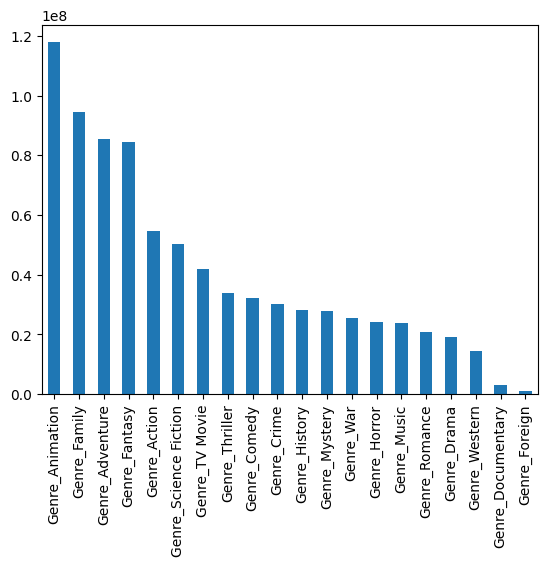

In [38]:
ax1 = genre_median_df.sort_values('revenue', ascending=False)['revenue'].plot.bar()